In [68]:
from KernFunc import *
from Physics import *

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [69]:
def exact_solution(x):
    """
    Exact solution of quantum oscillator
    """
    return np.pi**(-1/2)* np.exp(-x**2)

# Ground state search

In [82]:
N = 1000 # number of particles
L = 10 # size of the well

h =  0.3 # smoothing parameter
gamma =  3


m = 1/N

t = 0      # current time of the simulation
tEnd = 3*np.pi   # time at which simulation ends
dt  = 0.1  # timestep

np.random.seed(42)

pos_of_particles = np.random.uniform(-L/2, L/2, N) # initial position
vel = np.full(N, 0.) # initial vel

Nt = int(np.ceil(tEnd/dt)) # number of timesteps 

In [83]:
rho = get_density(pos_of_particles, m, h) # initial density

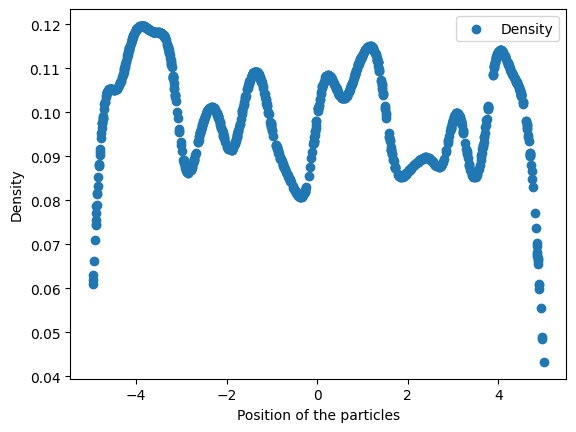

In [84]:
figure = plt.figure
plt.scatter(pos_of_particles, rho, label='Density')
plt.xlabel('Position of the particles')
plt.ylabel('Density')
plt.legend();

In [85]:
# initial conditions
d_rho = get_grad_density(pos_of_particles, m, h)
lap_rho = get_lap_density(pos_of_particles, rho, m, h)
P = pressure(pos_of_particles, rho, d_rho, lap_rho, m, h)
acc = Acceleration(pos_of_particles, P, rho, vel, gamma, m, h)

# leap-frog integrator

v_phalf = vel - 0.5*acc*dt

for i in range(1, Nt):
    v_fhalf = v_phalf + acc*dt
    
    pos_of_particles += v_fhalf*dt
    
    vel = 0.5*(v_phalf + v_fhalf)
    
    v_phalf = v_fhalf
    
    d_rho = get_grad_density(pos_of_particles, m, h)
    lap_rho = get_lap_density(pos_of_particles, rho, m, h)
    P = pressure(pos_of_particles, rho, d_rho, lap_rho, m, h)

    acc = Acceleration(pos_of_particles, P, rho, vel, gamma, m, h)   
    rho = get_density(pos_of_particles, m, h)

In [86]:
x =np.linspace(-L/2, L/2, 100)

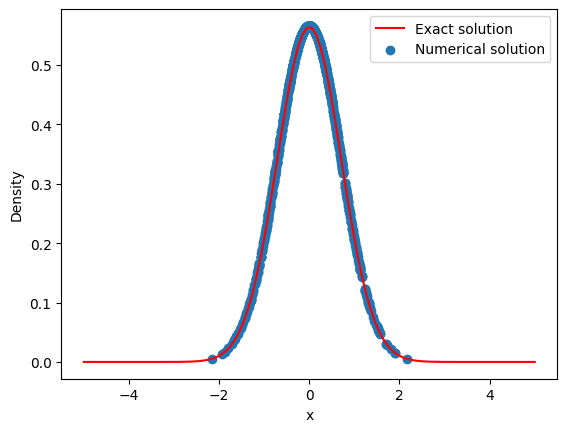

In [87]:
figure = plt.figure
plt.scatter(pos_of_particles, rho, label='Numerical solution')
plt.plot(x, exact_solution(x), color='red', label='Exact solution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend();

# Dynamics using ground state that i found

In [88]:
N = 1000 # number of particles
L = 10 # size of the well

h =  0.3 # smoothing parameter
gamma =  0


m = 1/N
t = 0      # current time of the simulation
tEnd = 3*np.pi/8   # time when simulation ends
dt  = 0.01  # timestep

np.random.seed(42)

pos_of_particles = pos_of_particles # initial position
vel = np.full(N, 1.) # initial vel

Nt = int(np.ceil(tEnd/dt)) # number of timesteps

In [89]:
init_rho = rho

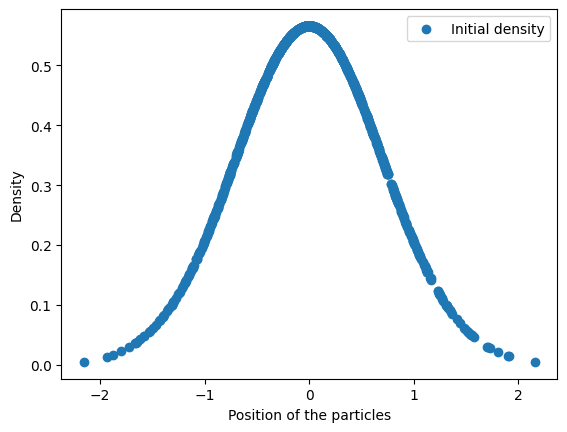

In [90]:
figure = plt.figure
plt.scatter(pos_of_particles, init_rho, label='Initial density')
plt.xlabel('Position of the particles')
plt.ylabel('Density')
plt.legend();

In [91]:
rho = init_rho

In [92]:
# initial conditions
d_rho = get_grad_density(pos_of_particles, m, h)
lap_rho = get_lap_density(pos_of_particles, rho, m, h)
P = pressure(pos_of_particles, rho, d_rho, lap_rho, m, h)
acc = Acceleration(pos_of_particles, P, rho, vel, gamma, m, h)

# leap-frog integrator

v_phalf = vel - 0.5*acc*dt

for i in range(1, Nt):
  
    v_fhalf = v_phalf + acc*dt
    
    pos_of_particles += v_fhalf*dt
    
    vel = 0.5*(v_phalf + v_fhalf)
    
    v_phalf = v_fhalf
    
    d_rho = get_grad_density(pos_of_particles, m, h)
    lap_rho = get_lap_density(pos_of_particles, rho, m, h)
    P = pressure(pos_of_particles, rho, d_rho, lap_rho, m, h)

    acc = Acceleration(pos_of_particles, P, rho, vel, gamma, m, h)    
    rho = get_density(pos_of_particles, m, h)


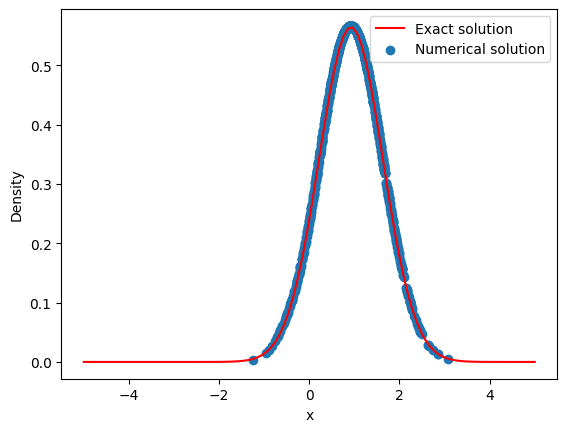

In [93]:
figure = plt.figure
plt.scatter(pos_of_particles, rho, label='Numerical solution')
plt.plot(x, exact_solution(x - np.sin(3*np.pi/8)), color='red', label='Exact solution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend();